## KNN

We have mostly focused on parametric models, like $p(\boldsymbol{y} \mid \boldsymbol{x}, \boldsymbol{\theta})$, where $\boldsymbol{\theta}$ is a fixed-dimensional vector of parameters. The parameters are estimated from a variable-sized dataset, $\mathcal{D}=\left\{\left(\boldsymbol{x}_n, \boldsymbol{y}_n\right): n=1: N\right\}$, but after model fitting, the data is thrown away.

We also consider various kinds of nonparametric models, that keep the training data around. Thus the memory usage of the model can grow with $|\mathcal{D}|$. We focus on models that can be defined in terms of the similarity between a test input, $\boldsymbol{x}$, and each of the training inputs, $\boldsymbol{x}_n$. Alternatively, we can define the models in terms of a dissimilarity or distance function $d\left(\boldsymbol{x}, \boldsymbol{x}_n\right)$.

We discuss one of the simplest kind of classifier, known as the $\mathbf{K}$ nearest neighbor (KNN) classifier. The idea is as follows: to classify a new input $\boldsymbol{x}$, we find the $K$ closest examples to $\boldsymbol{x}$ in the training set, denoted $N_K(\boldsymbol{x}, \mathcal{D})$, and then look at their labels, to derive a distribution over the outputs for the local region around $\boldsymbol{x}$. More precisely, we compute

$$
p(y=c \mid \boldsymbol{x}, \mathcal{D})=\frac{1}{K} \sum_{n \in N_K(\boldsymbol{x}, \mathcal{D})} \mathbb{I}\left(y_n=c\right)
$$


We can then return this distribution, or the majority label.
The two main parameters in the model are the size of the neighborhood, $K$, and the distance metric $d\left(\boldsymbol{x}, \boldsymbol{x}^{\prime}\right)$. For the latter, it is common to use the Mahalanobis distance

$$
d_{\mathrm{M}}(\boldsymbol{x}, \boldsymbol{\mu})=\sqrt{(\boldsymbol{x}-\boldsymbol{\mu})^{\top} \mathrm{M}(\boldsymbol{x}-\boldsymbol{\mu})}
$$

where $\mathbf{M}$ is a positive definite matrix. If $\mathbf{M}=\mathbf{I}$, this reduces to Euclidean distance.

In [1]:

# Imports

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score


from sklearn.datasets import make_blobs
from IPython import display
from matplotlib import pyplot as plt

import numpy as np

import pathlib
import shutil
import tempfile

from tqdm import tqdm

In [12]:
# In this notebook we will walk through KNN clustering technique
# Here we generate isotropic Gaussian blobs by using the make_blob function from sklearn
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=6, random_state=42)
ntrain = 100
x_train = X[:ntrain]
y_train = y[:ntrain]
x_test = X[ntrain:]
y_test = y[ntrain:]

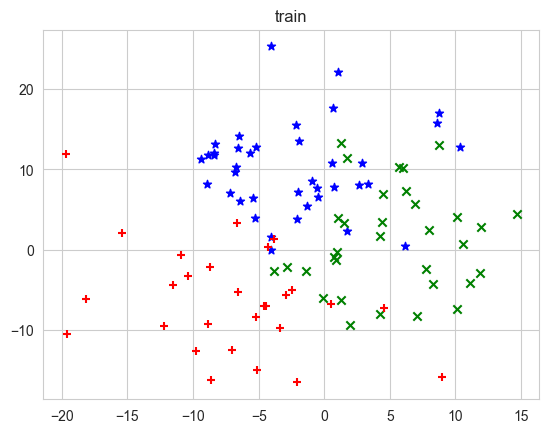

In [13]:
# Plotting the generated training dataset by class in a scatter plot
plt.figure()
y_unique = np.unique(y_train)
markers = "*x+"
colors = "bgr"
for i in range(len(y_unique)):
    plt.scatter(x_train[y_train == y_unique[i], 0], x_train[y_train == y_unique[i], 1], marker=markers[i], c=colors[i])
plt.title("train")

plt.show()

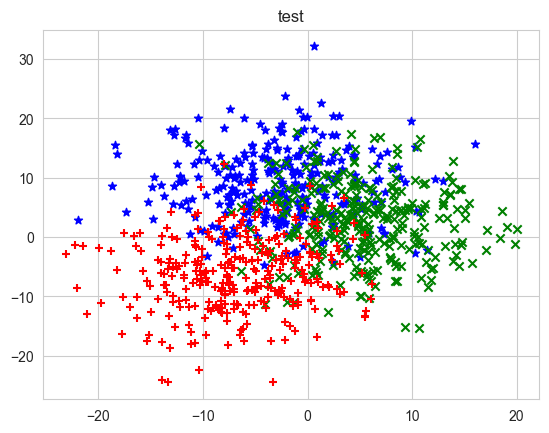

In [14]:
# Plotting the generated test dataset by class in a scatter plot
plt.figure()
for i in range(len(y_unique)):
    plt.scatter(x_test[y_test == y_unique[i], 0], x_test[y_test == y_unique[i], 1], marker=markers[i], c=colors[i])
plt.title("test")

plt.show()     

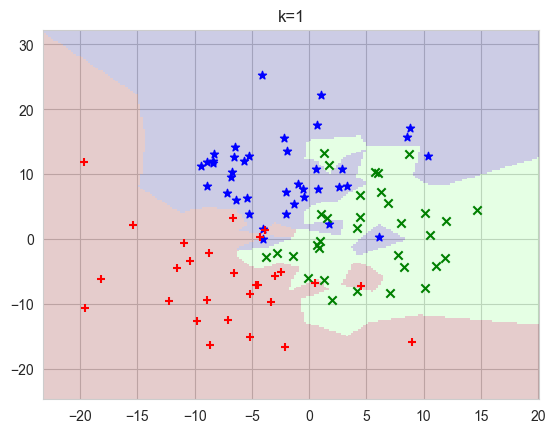

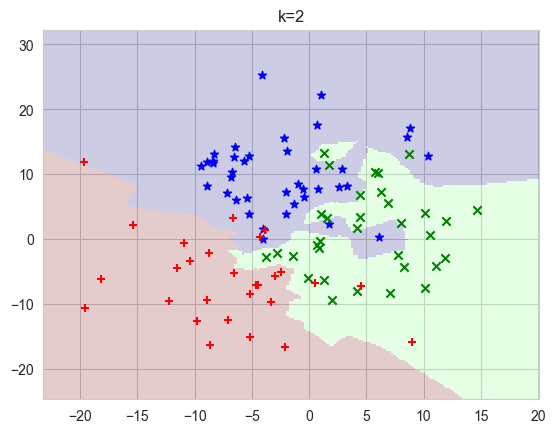

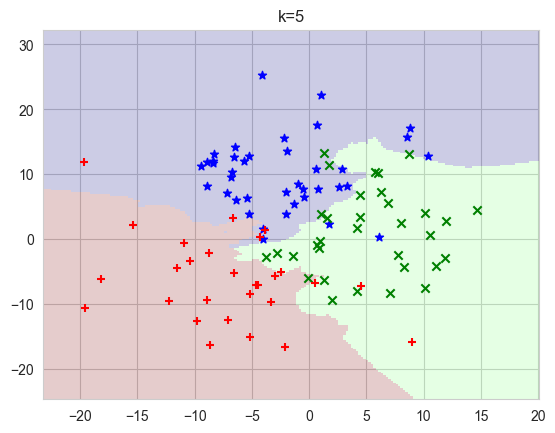

In [15]:
x = np.linspace(np.min(x_test[:, 0]), np.max(x_test[:, 0]), 200)
y = np.linspace(np.min(x_test[:, 1]), np.max(x_test[:, 1]), 200)
xx, yy = np.meshgrid(x, y)
xy = np.c_[xx.ravel(), yy.ravel()]

# Train a knn model and use the knn model to predict
for k in [1, 2, 5]:
    knn = KNN(n_neighbors=k)
    knn.fit(x_train, y_train)
    plt.figure()
    y_predicted = knn.predict(xy)

    plt.pcolormesh(xx, yy, y_predicted.reshape(200, 200), cmap="jet", alpha=0.2)
    for i in range(len(y_unique)):
        plt.scatter(
            x_train[y_train == y_unique[i], 0], x_train[y_train == y_unique[i], 1], marker=markers[i], c=colors[i]
        )
    plt.title("k=%s" % (k))

    plt.show()

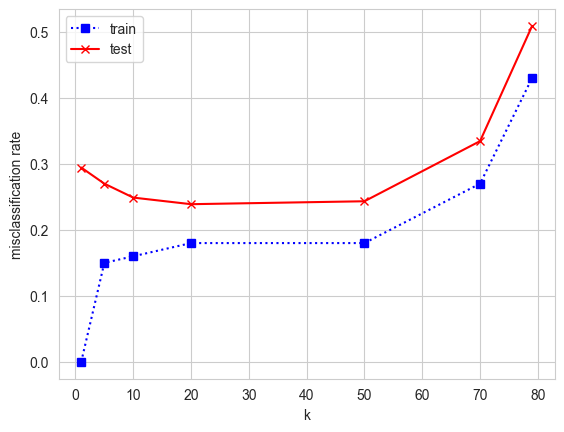

In [16]:
# plot train err and test err with different k
# ks = [int(n) for n in np.linspace(1, ntrain, 10)]
ks = [1, 5, 10, 20, 50, 70, 79]
train_errs = []
test_errs = []
for k in ks:
    knn = KNN(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_errs.append(1 - knn.score(x_train, y_train))
    test_errs.append(1 - knn.score(x_test, y_test))
plt.figure()
plt.plot(ks, train_errs, "bs:", label="train")
plt.plot(ks, test_errs, "rx-", label="test")
plt.legend()
plt.xlabel("k")
plt.ylabel("misclassification rate")

plt.show()

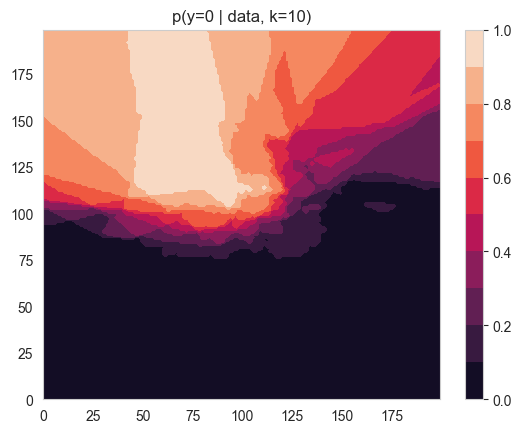

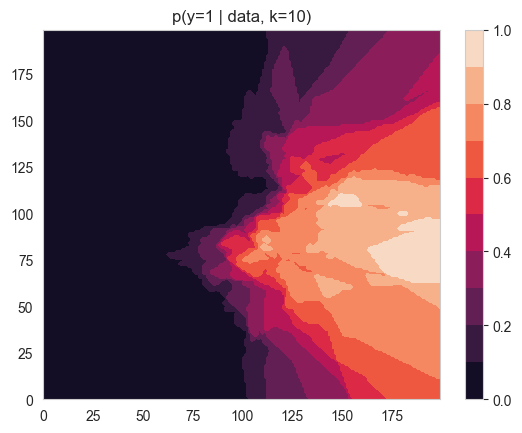

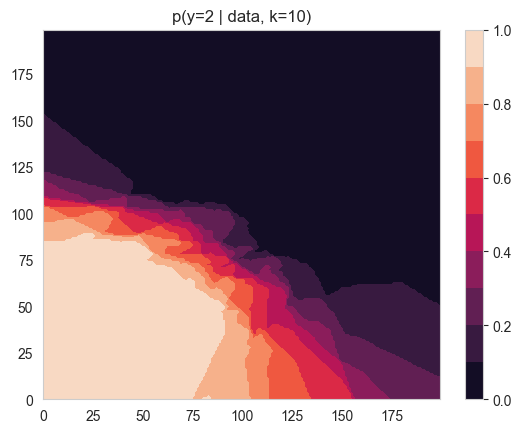

In [17]:
# draw hot-map to show the probability of different class
knn = KNN(n_neighbors=10)
knn.fit(x_train, y_train)
xy_predic = knn.predict_proba(xy)
levels = np.arange(0, 1.01, 0.1)
for i in range(3):
    plt.figure()
    plt.contourf(xy_predic[:, i].ravel().reshape(200, 200), levels)
    plt.colorbar()
    plt.title("p(y=%s | data, k=10)" % (i))
plt.show()